# Mislabel detection using influence function for all of trainset on Cifar-10, ResNet

### Author
[Neosapience, Inc.](http://www.neosapience.com)

### Pre-train model conditions
---
- dataset: cifar10
- network architecture: resnet
- made mis-label from 1 percentage dog class to horse class
- augumentation: on
- iteration: 80000
- batch size: 128

#### cifar-10 train dataset
|           | horse |  dog | airplane | automobile | bird |  cat | deer | frog | ship | truck |
|----------:|:-----:|:----:|:--------:|:----------:|:----:|:----:|:----:|:----:|:----:|:-----:|
|   label   |  5000 | **4950** |   5000   |    5000    | 5000 | 5000 | 5000 | 5000 | 5000 |  5000 |
| mis-label |   **50**  |      |          |            |      |      |      |      |      |       |
|   total   |  **5050** | 4950 |   5000   |    5000    | 5000 | 5000 | 5000 | 5000 | 5000 |  5000 |


### License
---
Apache License 2.0

### References
---
- Darkon Documentation: <http://darkon.io>
- Darkon Github: <https://github.com/darkonhub/darkon>
- Resnet code: <https://github.com/wenxinxu/resnet-in-tensorflow>
- More examples: <https://github.com/darkonhub/darkon-examples>

### Index
- [Draw function](#Draw-function)
- [Using one top layer](#Using-one-top-layer)
- [Using all of layers](#Using-all-of-layers)

### Draw function
---

In [1]:
def reindexing(scores, mislabel_indices):
    mislabel_scores = scores[mislabel_indices]
    scores = np.delete(scores, mislabel_indices)
    scores = np.append(scores, mislabel_scores)
    return scores

def draw(scores, mislabel_indices, save_path):
    scores = reindexing(scores, mislabel_indices)

    begin_mislabel_idx = scores.size - mislabel_indices.size
    print('num tests: {}, num mislabels: {}, begin of mislabel index: {}'.format(
        scores.size, mislabel_indices.size, begin_mislabel_idx))

    sorted_indices = np.argsort(scores)

    print('dogs in helpful: {} / 100'.format(np.sum(sorted_indices[-100:] >= begin_mislabel_idx)))
    print('mean for all: {}'.format(np.mean(scores)))
    print('mean for rightlabel: {}'.format(np.mean(scores[:begin_mislabel_idx])))
    print('mean for mislabel: {}'.format(np.mean(scores[begin_mislabel_idx:])))

    mislabel_ranking = np.where(sorted_indices >= begin_mislabel_idx)[0]
    print('all of mis-labels: {}'.format(mislabel_ranking))

    total = scores.size
    total_pos = mislabel_ranking.size
    total_neg = total - total_pos

    tpr = np.zeros([total_pos])
    fpr = np.zeros([total_pos])
    for idx in range(total_pos):
        tpr[idx] = float(total_pos - idx)
        fpr[idx] = float(total - mislabel_ranking[idx] - tpr[idx])

    tpr /= total_pos
    fpr /= total_neg

    histogram = sorted_indices >= begin_mislabel_idx
    histogram = histogram.reshape([10, -1])
    histogram = np.sum(histogram, axis=1)
    acc = np.cumsum(histogram[::-1])

    fig, ax = plt.subplots(1, 2, figsize=(20, 10))
    ax[0].set_ylabel('true positive rate')
    ax[0].set_xlabel('false positive rate')
    ax[0].set_ylim(0.0, 1.0)
    ax[0].set_xlim(0.0, 1.0)
    ax[0].grid(True)
    ax[0].plot(fpr, tpr)

    ax[1].set_ylabel('num of mis-label')
    ax[1].set_xlabel('threshold')
    ax[1].grid(True)
    ax[1].bar(range(10), acc)

    plt.sca(ax[1])
    plt.xticks(range(10), ['{}~{}%'.format(p, p + 10) for p in range(0, 100, 10)])
    plt.savefig(save_path)
    
    fig, ax = plt.subplots(figsize=(20, 5))
    ax.grid(True)
    ax.plot(scores)

### Using one top layer
---

num tests: 50000, num mislabels: 50, begin of mislabel index: 49950
dogs in helpful: 0 / 100
mean for all: 7.53761702702e-07
mean for rightlabel: 7.53794206434e-07
mean for mislabel: 7.21290474757e-07
all of mis-labels: [ 3292  3485  5077  5301  5316  5592  5908  6357  7883 10413 10752 11286
 11632 12151 12231 13483 13840 15137 15416 15543 15607 15890 16212 16481
 16529 18994 19112 19145 19930 19988 20776 22120 22877 22937 23234 23315
 24040 24455 24532 24970 25810 28383 29147 30318 30843 31190 31379 33622
 35657 42193]


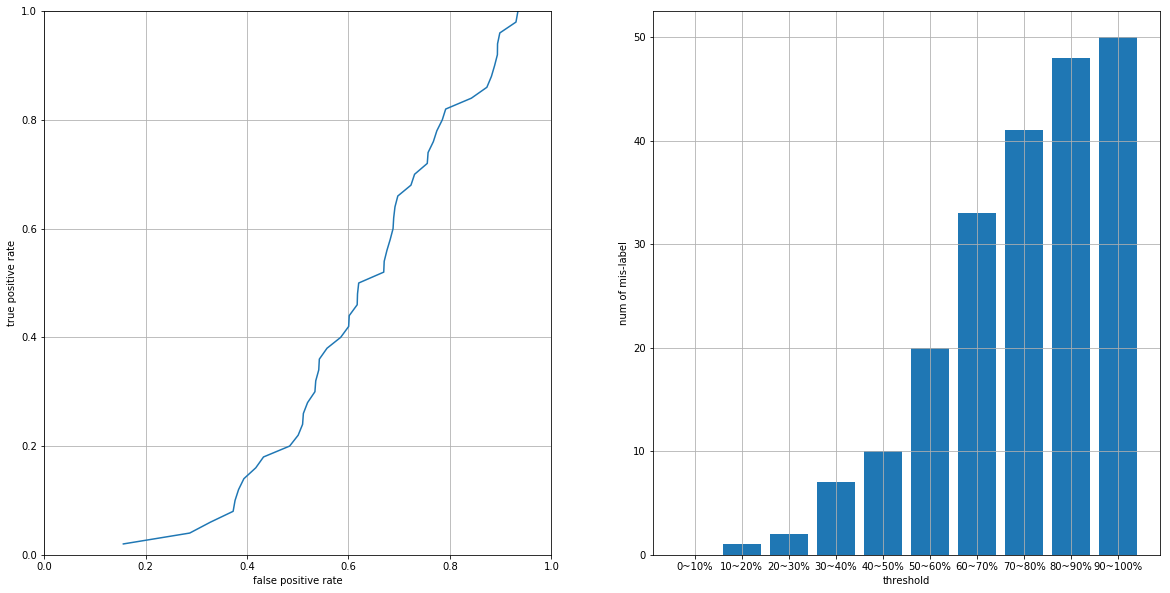

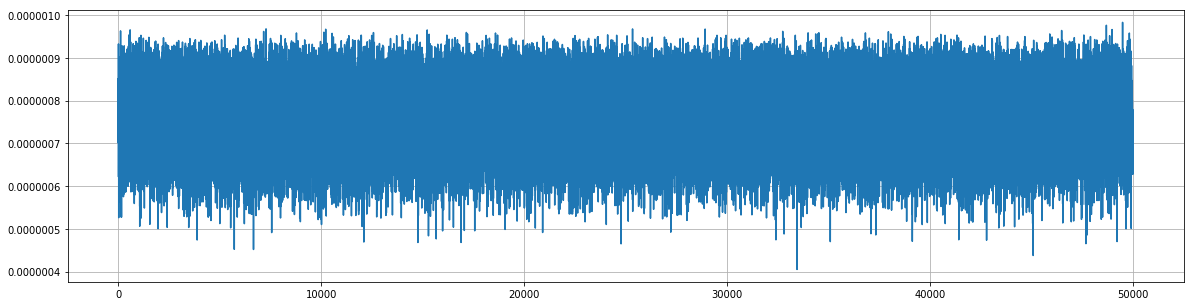

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

scores = np.load('mislabel-result-part1.npy')
scores = np.append(scores, np.load('mislabel-result-part2.npy'))
mislabel_indices = np.loadtxt('mislabel-indices.txt').astype(np.int32)

draw(scores, mislabel_indices, 'mislabel-result-one-layer-all-classes.png')

### Using all of layers
---

num tests: 50000, num mislabels: 50, begin of mislabel index: 49950
dogs in helpful: 1 / 100
mean for all: 3.04675686494e-06
mean for rightlabel: 3.04649535894e-06
mean for mislabel: 3.30800135843e-06
all of mis-labels: [ 2177  7262 11519 13788 14069 14726 14982 15092 15314 16080 17263 17639
 18336 19365 19772 20729 21414 22211 22464 22680 25152 28311 28675 29063
 29440 30049 30204 31216 32486 33153 34329 34770 37706 39064 39067 39320
 40463 41011 41117 41239 42983 43005 43116 45189 45716 46554 47458 47961
 49374 49923]


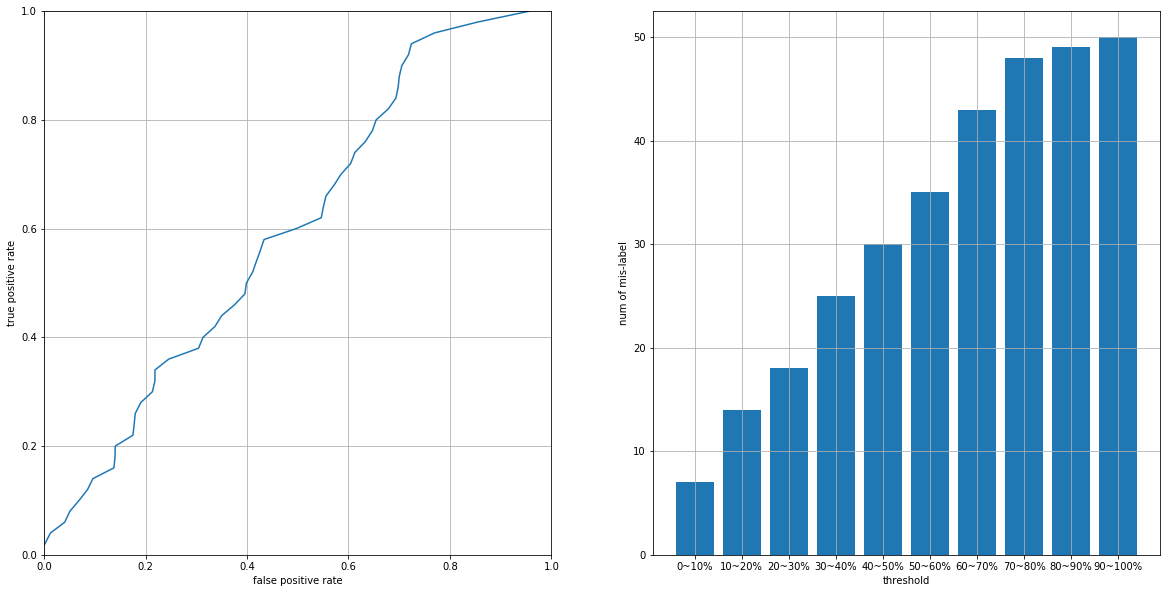

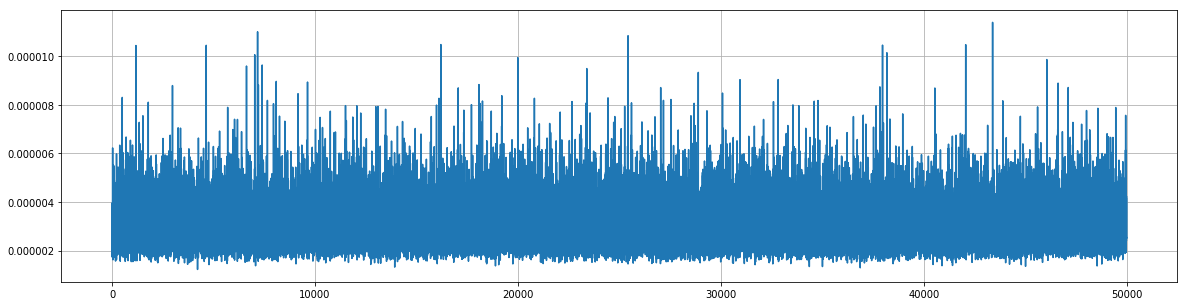

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

scores = np.load('mislabel-result-all-part1.npy')
scores = np.append(scores, np.load('mislabel-result-all-part2.npy'))
mislabel_indices = np.loadtxt('mislabel-indices.txt').astype(np.int32)

draw(scores, mislabel_indices, 'mislabel-result-all-layer-all-classes.png')

### License

---
<pre>
Copyright 2017 Neosapience, Inc.

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.
</pre>

---